In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Some functions for plotting. The code holds no conceptual value.

In [2]:
def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_table(r):
    """
    Generate a table of 1000 x,y data points in standard units
    whose correlation is approximately equal to r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

And you especially don't need to worry about these two functions here!

In [3]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

## Review

In [4]:
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

In [5]:
def slope(t, x, y):
    """Computes the slope of the regression line"""
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

## (1) New material

In [6]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.sample().show(5)

Today, we will focus on just two of the variables in this dataset.

In [7]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

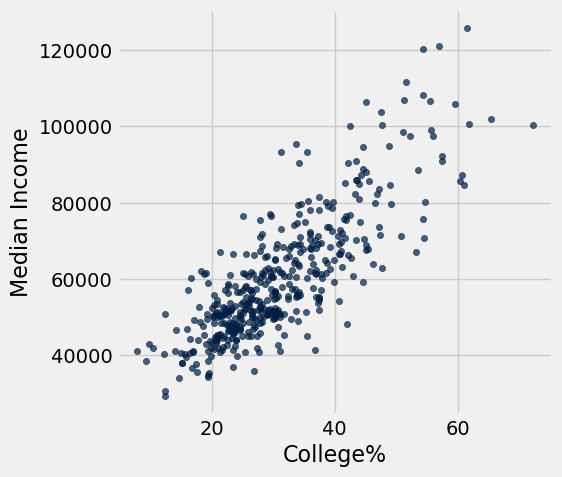

In [8]:
demographics.scatter('College%', 'Median Income')

In [9]:
correlation(demographics, 'College%', 'Median Income')

0.81846485171413352

In [10]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
make_array(regression_slope, regression_intercept)

array([  1270.70168946,  20802.57776668])

### Error: How well are we doing at predicting *y*?

In [11]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    m = slope(t, x, y)
    b = intercept(t, x, y)
    return m*t.column(x) + b

In [12]:
predicted = fitted_values(demographics, 'College%', 'Median Income')
demographics = demographics.with_column(
    'Linear Prediction for Median Income', predicted)
demographics

Median Income | College% | Linear Prediction for Median Income
47083         | 24       | 51299.4
42035         | 21.8     | 48503.9
46544         | 22.8     | 49774.6
41110         | 17       | 42404.5
51690         | 30.3     | 59304.8
61413         | 36.7     | 67437.3
34664         | 19.4     | 45454.2
76440         | 29.6     | 58415.3
50537         | 24.5     | 51934.8
49072         | 34       | 64006.4
... (425 rows omitted)

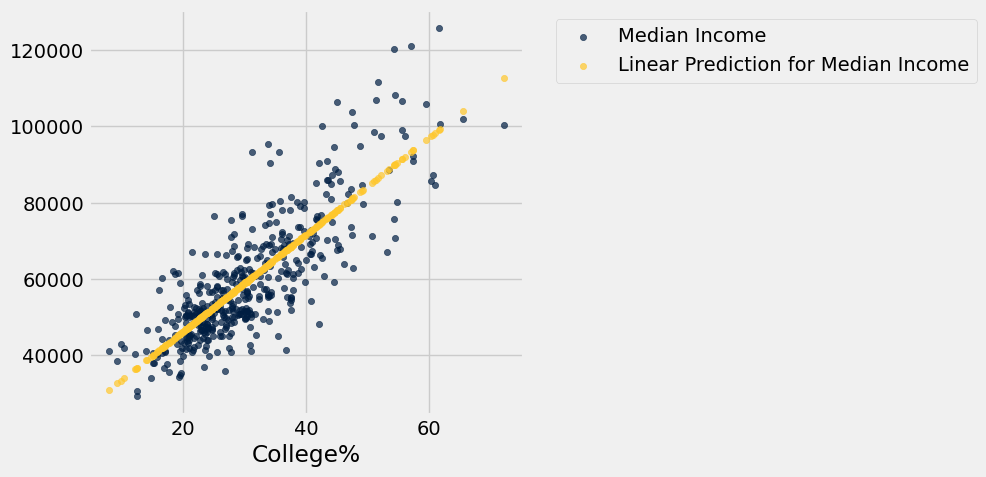

In [13]:
demographics.scatter('College%')

In [14]:
actual = demographics.column('Median Income')
errors = actual - predicted

In [29]:
demographics.with_column('Error', errors)

Median Income | College% | Linear Prediction for Median Income | Error
47083         | 24       | 51299.4                             | -4216.42
42035         | 21.8     | 48503.9                             | -6468.87
46544         | 22.8     | 49774.6                             | -3230.58
41110         | 17       | 42404.5                             | -1294.51
51690         | 30.3     | 59304.8                             | -7614.84
61413         | 36.7     | 67437.3                             | -6024.33
34664         | 19.4     | 45454.2                             | -10790.2
76440         | 29.6     | 58415.3                             | 18024.7
50537         | 24.5     | 51934.8                             | -1397.77
49072         | 34       | 64006.4                             | -14934.4
... (425 rows omitted)

### (2) How do we summarize all the errors?

In [30]:
mse = np.average(errors ** 2)
mse

88332095.268617392

In [31]:
rmse = np.average(errors ** 2) ** 0.5
rmse

9398.5155885712811

For a few diffrent lines, we can:
- visualize the errors for a few select points
- as well as see the total $\text{RMSE}$

In [32]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y_actual = demographics.column('Median Income')
    y_prediction = slope * x + intercept
    error = y_actual - y_prediction
    rmse = (np.mean((error) ** 2)) ** 0.5
    print("Root mean squared error:", round(rmse, 2))

Root mean squared error: 11559.09


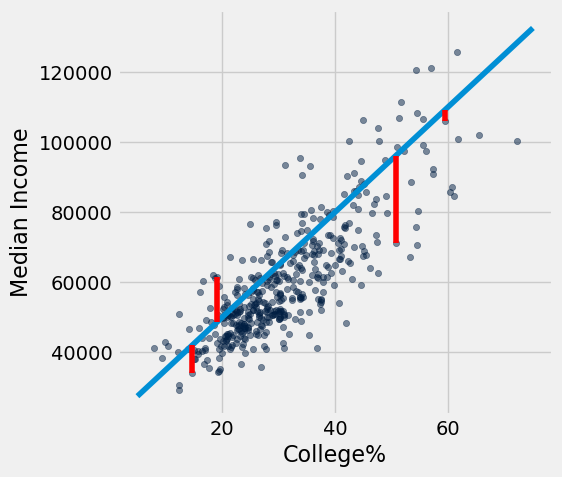

In [33]:
show_demographics_rmse(1500, 20000)

Root mean squared error: 30247.88


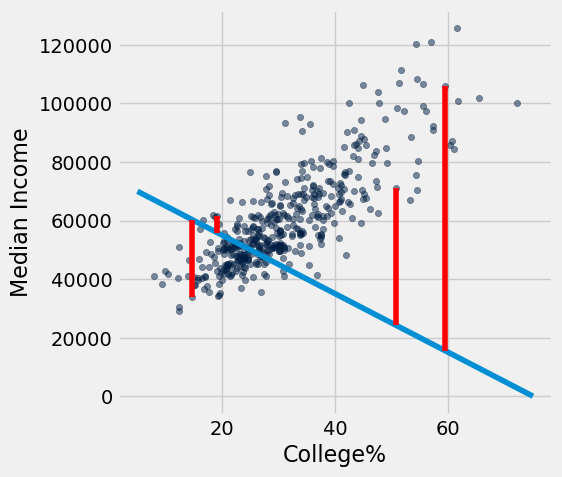

In [34]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 9398.52


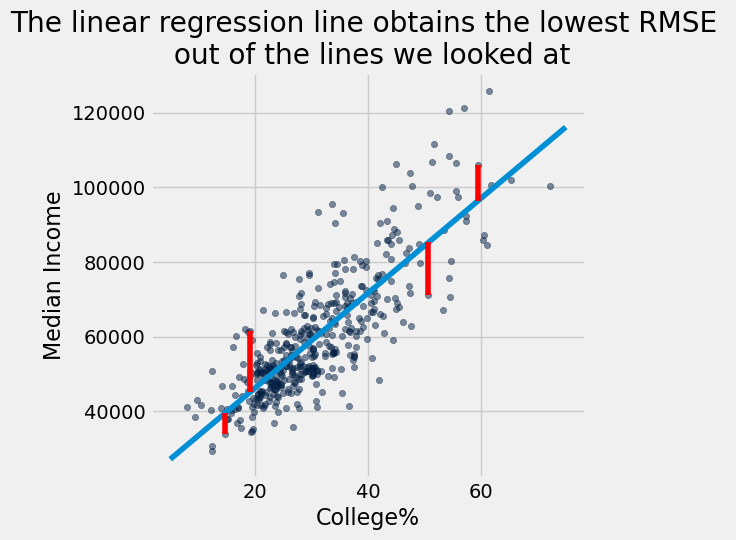

In [35]:
show_demographics_rmse(regression_slope, regression_intercept)
plots.title('The linear regression line obtains the lowest RMSE \n out of the lines we looked at');

### (3) Numerical optimization is widely used!

A nonlinear function is plotted below, and a function definition is then given.

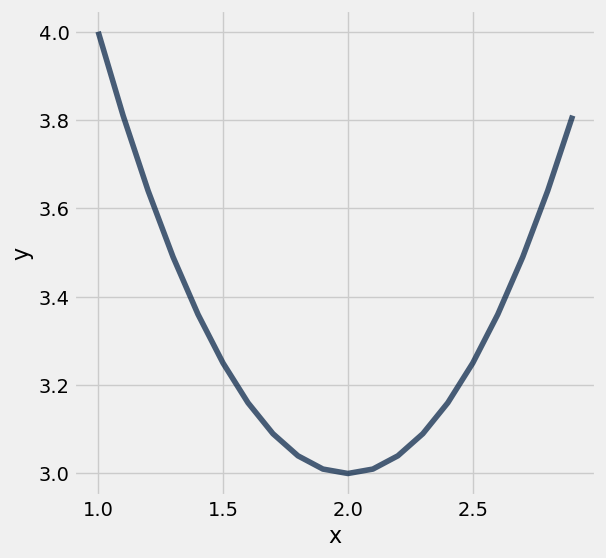

In [36]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [37]:
def f(x):
    return ((x-2)**2) + 3

In [38]:
minimize(f)

1.9999999946252267

A very, very complicated function:

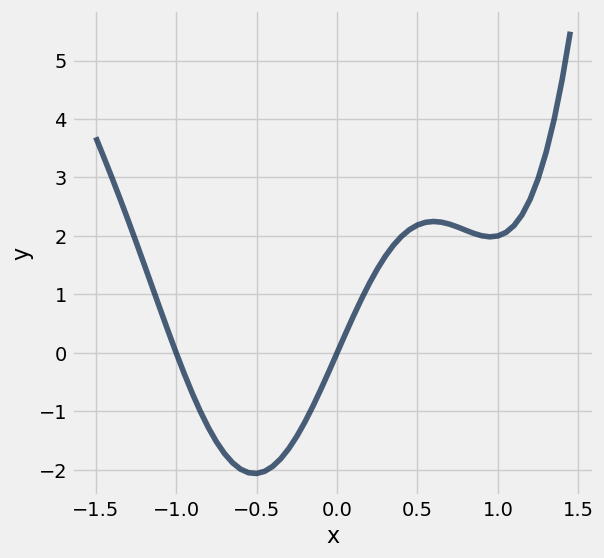

In [39]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 
Table().with_columns('x', x, 'y', y2).plot('x')

In [40]:
def very_very_complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 

In [41]:
minimize(very_very_complicated_function)

-0.5126437620940081

### (4) Numerical optimization example: $\text{RMSE}$

In [49]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y_actual = demographics.column('Median Income')
    y_predicted = any_slope*x + any_intercept
    rmse = (np.mean((y_actual - y_predicted) ** 2)) ** 0.5
    return rmse

In [50]:
demographics_rmse(1500, 20000)

11559.086490075999

In [44]:
demographics_rmse(-1000, 75000)

30247.883767944502

#### Using minimze function to find the slope and intercept that minimizes RMSE

In [52]:
least_squares = minimize(demographics_rmse)
least_squares

array([  1270.70168805,  20802.57933807])

In [55]:
least_squares_slope = least_squares.item(0)
least_squares_intercept = least_squares.item(1)
least_squares_slope, least_squares_intercept

(1270.7016880503652, 20802.57933807212)

In [61]:
x = demographics.column('College%')
least_squares_predictions = least_squares_slope*x + least_squares_intercept
least_squares_predictions[1:10] #fancy array indexing is out of scope

array([ 48503.87613757,  49774.57782562,  42404.50803493,  59304.840486  ,
        67437.33128952,  45454.19208625,  58415.34930436,  51934.77069531,
        64006.43673178])

### Comparing minimize output to slope and intercept values using the regression formulas

In [46]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
make_array(regression_slope, regression_intercept)

array([  1270.70168946,  20802.57776668])

### (Cool Material) Nonlinear regression

In [ ]:
shotput = Table.read_table('shotput.csv')
shotput.show(6)

In [ ]:
shotput.scatter('Weight Lifted')

#### Linear function 
$$
f(x) ~=~ ax + b 
$$

for constants $a$ and $b$.


In [ ]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [ ]:
best_line = minimize(shotput_linear_rmse)
best_line

In [ ]:
weights = shotput.column(0)

In [ ]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

#### Quadratic function

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.

In [ ]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [ ]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

Prediction for a person who can lift 100 kg:

In [ ]:
weight_lifted_kg = 100 

prediction = (-0.00104)*(weight_lifted_kg**2) + 0.2827*weight_lifted_kg - 1.5318
prediction

In [ ]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

In [ ]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

**Task**: Find which model is a better fit.

In [ ]:
shotput_quadratic_rmse(-1.04003731e-03,   2.82706003e-01,  -1.53167618e+00)

In [ ]:
shotput_linear_rmse(0.09834382,  5.95962883)